In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [42]:
df=pd.read_csv('pokemon_data.csv')
df=df.set_index('name')

In [43]:
favs=pd.read_excel('pokemon_favourites.xlsx')
favs=favs.set_index('name')

In [44]:
df=pd.merge(df, favs, left_index=True, right_index=True, how='left').reset_index()

In [45]:
df

,name,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,...,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,number of votes
0,Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,710.0
1,Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,83.0
2,Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,127.0
3,Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,374.0
4,Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,Raging Bolt,1021,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox,NaN
1021,Iron Boulder,1022,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,NaN
1022,Iron Crown,1023,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,NaN
1023,Terapagos,1024,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary,NaN


In [46]:
generation_counts = df['generation'].value_counts().sort_index()


In [50]:
# 1. (Opcjonalnie) Filtrujemy tylko 7 pierwszych generacji
df_sub = df[df['generation'] <= 7]

# 2. Grupujemy po generacji i znajdujemy indeks wiersza z max liczbą głosów
idx = df_sub.groupby('generation')['number of votes'].idxmax()

# 3. Wyciągamy dexnum dla tych indeksów
# .loc[] wybiera wiersze na podstawie znalezionych indeksów
top_dexnums = df_sub.loc[idx, ['generation', 'dexnum', 'number of votes']]

print(top_dexnums)

     generation  dexnum  number of votes
5             1       6           1107.0
196           2     197            607.0
256           3     257            613.0
447           4     448            604.0
636           5     637            290.0
699           6     700            282.0
777           7     778            284.0


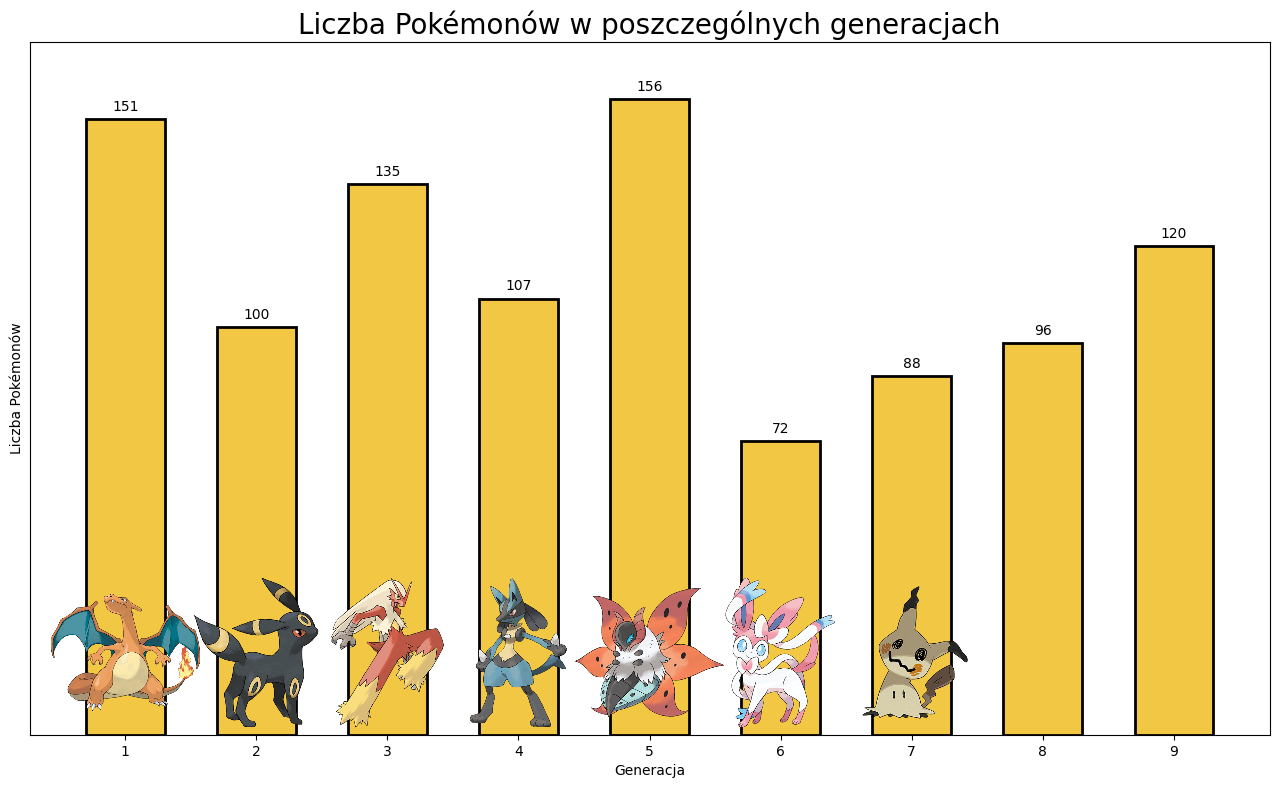

In [53]:

fig, ax = plt.subplots(figsize=(16,9))
plt.bar(generation_counts.index, generation_counts.values, color='#F1C744', edgecolor='black', width=0.6, linewidth=2)

# opisy osi i tytuł
plt.xlabel('Generacja')
plt.ylabel('Liczba Pokémonów')
plt.title('Liczba Pokémonów w poszczególnych generacjach', fontsize=20)

for i, v in enumerate(generation_counts.values):
    plt.text(generation_counts.index[i], v + 2, str(v), ha='center')

for index, row in top_dexnums.iterrows():
    gen = row['generation']
    dex = int(row['dexnum'])
    
    # Wczytanie obrazka (zakładam, że nazwy to np. '25.png')
    img = plt.imread(f'images/images/{dex}.png')
    
    # Tworzenie obiektu obrazka
    imagebox = OffsetImage(img, zoom=0.25) # Dostosuj zoom, jeśli obrazki są za duże/małe
    
    # Wstawienie obrazka
    # xy=(gen, 0) -> pozycja na osi X to numer generacji, Y to 0 (dół słupka)
    # box_alignment=(0.5, 0) -> punkt (gen, 0) to środek dolnej krawędzi obrazka
    ab = AnnotationBbox(imagebox, xy=(gen, 0), frameon=False, box_alignment=(0.5, 0))
    
    ax.add_artist(ab)



plt.yticks([])
plt.xticks(range(1, df['generation'].max() + 1))
plt.ylim(0,170)
plt.show()